# Retail Price Prediction for Cars

# 1. Data Preprocessing

## 1.1 Load and Inspect the Dataset

In [27]:
import pandas as pd

data = pd.read_csv('data.csv' )
print(data.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

## 1.2 Handle Missing Values

In [28]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical values with the median
numerical_features = ['Engine HP', 'Engine Cylinders', 'Number of Doors']
for col in numerical_features:
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing categorical values with the mode
categorical_features = ['Engine Fuel Type', 'Market Category']
for col in categorical_features:
    data[col].fillna(data[col].mode()[0], inplace=True)


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


## 1.3 Remove Duplicates

In [29]:
# Remove duplicates
data = data.drop_duplicates()


## 1.4 Scale the Target Variable 

In [30]:
# Scale MSRP by 10,000
data['MSRP'] = data['MSRP'] / 10000  


# 2. Exploratory Data Analysis (EDA)

## 2.1 Univariate Analysis:

<Axes: ylabel='Frequency'>

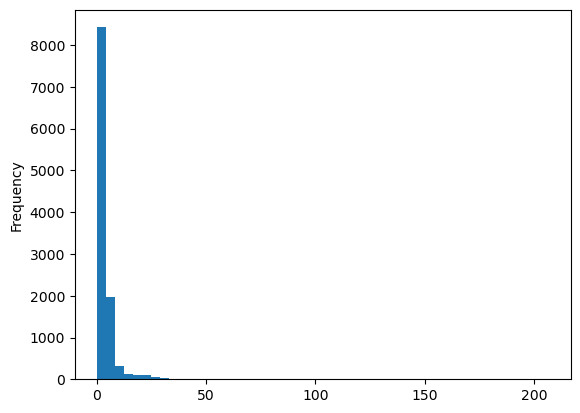

In [31]:
# Visualize MSRP distributions using histograms or KDE plots.(Identify skewness and kurtosis.)
data['MSRP'].plot(kind='hist', bins=50)


<Axes: xlabel='Make'>

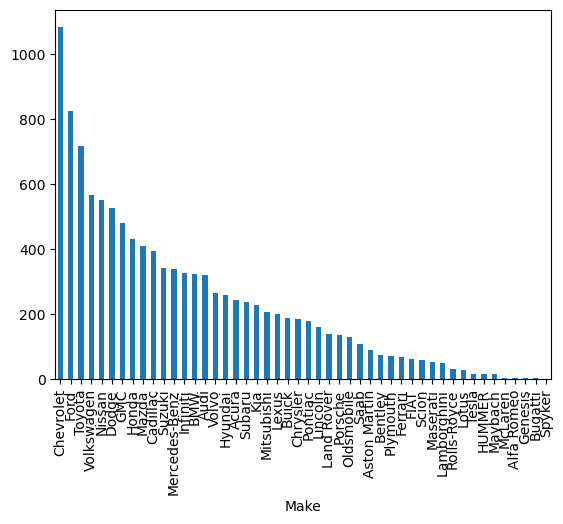

In [32]:
# Count the frequency of each category
data['Make'].value_counts().plot(kind='bar')


## 2.2 Bivariate Analysis:

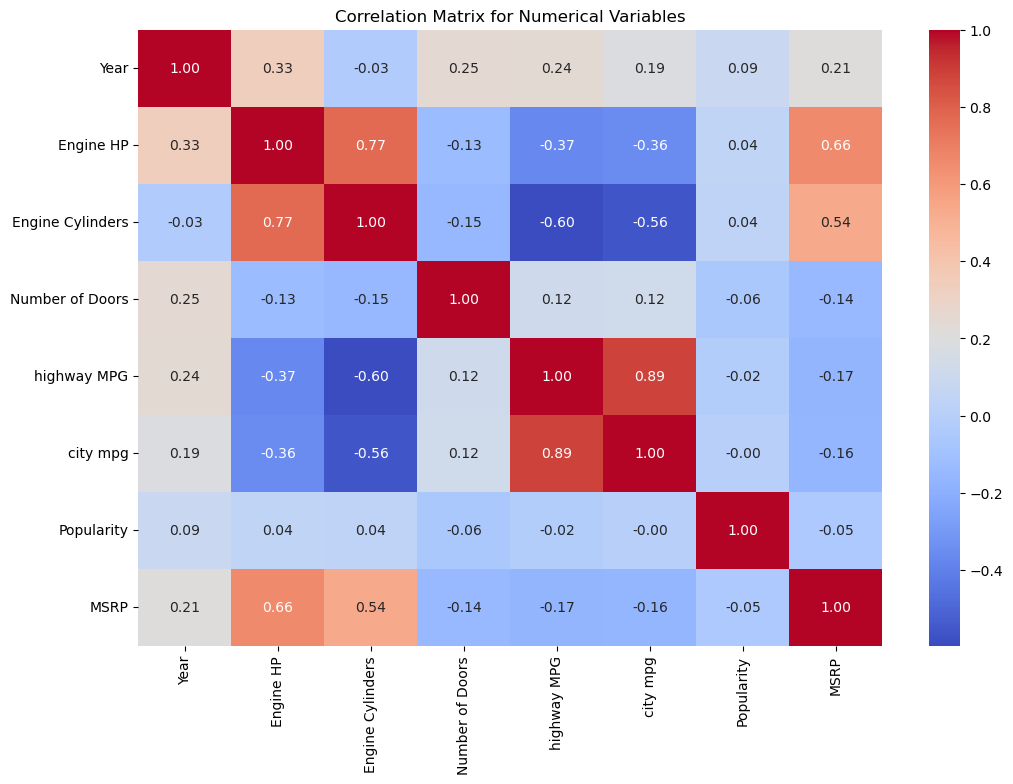

In [33]:
import seaborn as sns
import numpy as np

# Compute correlations for numerical variables.
numeric_data = data.select_dtypes(include=[np.number])
# print(numeric_data.corr())
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


# 3. Feature Engineering

In [34]:

# One-Hot Encoding for Categorical Variables
columns_to_dummy = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
                    'Market Category', 'Vehicle Size', 'Vehicle Style']

existing_columns_to_dummy = [col for col in columns_to_dummy if col in data.columns]

data = pd.get_dummies(data, columns=existing_columns_to_dummy, drop_first=True)


In [35]:
# Drop irrelevant features
data = data.drop(['Make', 'Model'], axis=1)


# 4. Train-Test Split 

In [36]:
from sklearn.model_selection import train_test_split

X = data.drop('MSRP', axis=1)
y = data['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# For some models need to scale the data
# from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


# 5. Model Building